In [1]:
!git clone https://github.com/tejalbarnwal/soc_mini_project.git

fatal: destination path 'soc_mini_project' already exists and is not an empty directory.


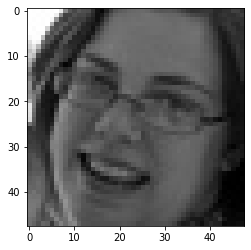

In [2]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("/content/soc_mini_project/dataset/train/happy/Training_10019449.jpg")
img = cv2.resize(img, (48,48))
plt.imshow(img, cmap="gray")
plt.show()

In [3]:
from datetime import datetime
%load_ext tensorboard
!rm -rf ./logs/
from tensorflow.keras.callbacks import TensorBoard

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir = "/content/soc_mini_project/dataset/train"
val_dir = "/content/soc_mini_project/dataset/test"

# train_datagen = ImageDataGenerator(rescale = 1/255., rotation_range = 10, width_shift_range=0.2,height_shift_range=0.2,
#                                    horizontal_flip = True,zoom_range = 0.1)
train_datagen = ImageDataGenerator(rescale = 1/255., horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1/255.)

training_data = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (48,48),
                  batch_size = 64,
                  color_mode = "grayscale",
                  class_mode = "categorical"
)

validation_data = val_datagen.flow_from_directory(
                    val_dir,
                    target_size = (48,48),
                    batch_size = 64,
                    color_mode = "grayscale",
                    class_mode = "categorical"
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

# defining a convnet

num_filter_1 = 64
num_filter_2 = 128
num_filter_3 = 256
num_filter_4 = 512

#initailizing the model
teju_model = models.Sequential()
########################### 1st conv layer##################################
teju_model.add(layers.Conv2D(num_filter_1 , (3,3),padding="same" , activation="relu" , input_shape=(48,48,1)))
teju_model.add(layers.BatchNormalization())
teju_model.add(layers.MaxPooling2D((2,2)))
teju_model.add(layers.Dropout(0.3))
teju_model.add(layers.BatchNormalization())
#############################2nd conv layer##################################
teju_model.add(layers.Conv2D(num_filter_2 , (3,3),padding="same"  , activation="relu"))
teju_model.add(layers.BatchNormalization())
teju_model.add(layers.MaxPooling2D((2,2)))
teju_model.add(layers.Dropout(0.3))
teju_model.add(layers.BatchNormalization())
#############################3rd conv layer##################################
teju_model.add(layers.Conv2D(num_filter_3 , (3,3),padding="same"  , activation="relu"))
teju_model.add(layers.BatchNormalization())
teju_model.add(layers.MaxPooling2D((2,2)))
teju_model.add(layers.Dropout(0.3))
teju_model.add(layers.BatchNormalization())
##############################4th conv layer#################################
teju_model.add(layers.Conv2D(num_filter_4 , (3,3),padding="same"  , activation="relu"))
teju_model.add(layers.BatchNormalization())
teju_model.add(layers.MaxPooling2D((2,2)))
teju_model.add(layers.Dropout(0.3))
teju_model.add(layers.BatchNormalization())
##############################5th conv layer#################################
teju_model.add(layers.Conv2D(num_filter_4 , (3,3),padding="same"  , activation="relu"))
teju_model.add(layers.BatchNormalization())
teju_model.add(layers.MaxPooling2D((2,2)))
teju_model.add(layers.Dropout(0.5))
teju_model.add(layers.BatchNormalization())




In [7]:
# adding a classifier

num_units_1 = 256
num_units_2 = 128
num_units_3 = 64

teju_model.add(layers.Flatten())
############################1st dense layer##########################################
teju_model.add(layers.Dense( num_units_1 , activation="relu"))
teju_model.add(layers.Dropout(0.3))
teju_model.add(layers.BatchNormalization())
##############################2nd dense layer##########################################
teju_model.add(layers.Dense( num_units_2 , activation="relu"))
teju_model.add(layers.Dropout(0.3))
teju_model.add(layers.BatchNormalization())
##############################3rd#############
teju_model.add(layers.Dense( num_units_3 , activation="relu"))
teju_model.add(layers.Dropout(0.3))


teju_model.add(layers.Dense( 7 , activation="softmax"))


In [8]:
teju_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       5

In [9]:
from keras import optimizers

opt = optimizers.Adam(learning_rate = 0.001)
# opt1 = optimizers.SGD(
#     learning_rate=0.01, momentum=0.9)
teju_model.compile(optimizer=opt ,loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
# compiling the model and fiiting on train images
from tensorflow.keras import callbacks

class SaveBestModel(callbacks.Callback):
    def __init__(self, save_best_metric='val_loss', this_max=False):
        self.save_best_metric = save_best_metric
        self.max = this_max
        if this_max:
            self.best = float('-inf')
        else:
            self.best = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        metric_value = logs[self.save_best_metric]
        if self.max:
            if metric_value > self.best:
                self.best = metric_value
                self.best_weights = self.model.get_weights()

        else:
            if metric_value < self.best:
                self.best = metric_value
                self.best_weights= self.model.get_weights()


save_best_model = SaveBestModel()

num_epochs = 40
teju_history = teju_model.fit(
                  training_data,
                  steps_per_epoch = training_data.n//training_data.batch_size,
                  epochs = num_epochs,
                  validation_data = validation_data,
                  validation_steps = validation_data.n//validation_data.batch_size,
                  callbacks=[save_best_model]
)

Epoch 1/40
448/448 [==============================] - 18s 31ms/step - loss: 1.9487 - accuracy: 0.2205 - val_loss: 1.8118 - val_accuracy: 0.2472
Epoch 2/40
448/448 [==============================] - 13s 29ms/step - loss: 1.7177 - accuracy: 0.2988 - val_loss: 1.6527 - val_accuracy: 0.3337
Epoch 3/40
448/448 [==============================] - 13s 29ms/step - loss: 1.5499 - accuracy: 0.3938 - val_loss: 1.4582 - val_accuracy: 0.4251
Epoch 4/40
448/448 [==============================] - 13s 30ms/step - loss: 1.4265 - accuracy: 0.4509 - val_loss: 1.3612 - val_accuracy: 0.4761
Epoch 5/40
448/448 [==============================] - 13s 29ms/step - loss: 1.3485 - accuracy: 0.4854 - val_loss: 1.2905 - val_accuracy: 0.5032
Epoch 6/40
448/448 [==============================] - 13s 29ms/step - loss: 1.2853 - accuracy: 0.5120 - val_loss: 1.2655 - val_accuracy: 0.5191
Epoch 7/40
448/448 [==============================] - 13s 29ms/step - loss: 1.2301 - accuracy: 0.5361 - val_loss: 1.3788 - val_accuracy:

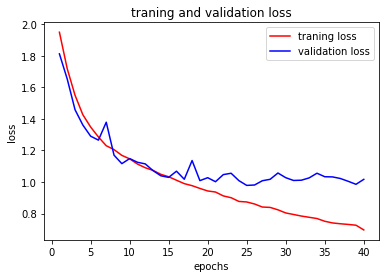

In [11]:
# plotting training and validation loss

loss = teju_history.history["loss"]
val_loss = teju_history.history["val_loss"]

epochs = range(1 , len(loss)+1)

plt.plot(epochs , loss , "r" , label="traning loss")
plt.plot(epochs , val_loss , "b" , label="validation loss")
plt.title("traning and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()


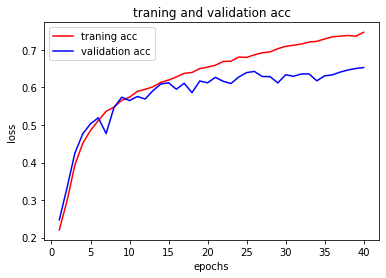

In [12]:
# plotting training and validation accuracy

loss = teju_history.history["accuracy"]
val_loss = teju_history.history["val_accuracy"]

epochs = range(1 , len(loss)+1)

plt.plot(epochs , loss , "r" , label="traning acc")
plt.plot(epochs , val_loss , "b" , label="validation acc")
plt.title("traning and validation acc")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()


In [14]:
teju_model.set_weights(save_best_model.best_weights)

In [15]:
teju_model.save_weights('weights.h5')
teju_model.save('model')

INFO:tensorflow:Assets written to: model/assets
